In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('bitcoin.csv')
df.head()

Mounted at /content/drive


Saving bitcoin.csv to bitcoin.csv


,cryptoName,date,open,close,high,low,average,volume,trade_count,vwap,timestamp
0,BTC/USD,02/05/2021,37102.75,39051.00,39699.95,37070.01,38384.980,1153.670297,55838.0,38439.087793,2021-02-05 06:00:00+00:00
1,BTC/USD,02/06/2021,39054.20,38571.85,41019.93,38000.00,39509.965,1238.672877,63997.0,39759.608536,2021-02-06 06:00:00+00:00
2,BTC/USD,02/07/2021,38565.36,38700.00,39736.17,37383.51,38559.840,932.225474,46244.0,38455.814609,2021-02-07 06:00:00+00:00
3,BTC/USD,02/08/2021,38712.80,46964.37,47500.00,38658.96,43079.480,2876.161989,91292.0,44010.764310,2021-02-08 06:00:00+00:00
4,BTC/USD,02/09/2021,46957.60,46166.35,48203.13,45040.00,46621.565,1420.610386,59671.0,46688.885698,2021-02-09 06:00:00+00:00


In [3]:
series = df['close'].values.reshape(len(df), 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(series)

In [4]:
import math
train_size = math.floor((len(scaled_data) - 60) * 0.8)
X_train = []
y_train = []
for i in range(60, 60 + train_size):
  X_train.append(scaled_data[i-60:i, 0])
  y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
X_train.shape

(515, 60, 1)

In [7]:
X_test = []
y_test = []
for i in range(60 + train_size, len(scaled_data)):
  X_test.append(scaled_data[i-60:i, 0])
  y_test.append(scaled_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
X_test.shape

(129, 60, 1)

In [9]:
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
515/515 [==============================] - 9s 8ms/step - loss: 0.0083
Epoch 2/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0036
Epoch 3/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0025
Epoch 4/10
515/515 [==============================] - 5s 9ms/step - loss: 0.0023
Epoch 5/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0018
Epoch 6/10
515/515 [==============================] - 4s 7ms/step - loss: 0.0016
Epoch 7/10
515/515 [==============================] - 5s 10ms/step - loss: 0.0015
Epoch 8/10
515/515 [==============================] - 4s 7ms/step - loss: 0.0014
Epoch 9/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0018
Epoch 10/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0015


In [10]:
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

5/5 [==============================] - 1s 6ms/step


129

In [11]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
rmse = mse(df['close'][60 + train_size:], predictions_1, squared=False)
rmse

1237.268422235897

Text(0.5, 0, 'epochs')

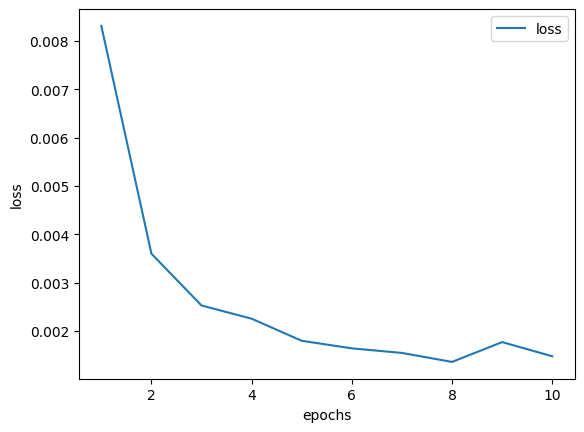

In [12]:
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [13]:
# Train the model again with 7 epochs
# but first we need to create another model so we can compare them together

# building LSTM model_2
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
515/515 [==============================] - 7s 8ms/step - loss: 0.0080
Epoch 2/6
515/515 [==============================] - 4s 8ms/step - loss: 0.0035
Epoch 3/6
515/515 [==============================] - 5s 10ms/step - loss: 0.0025
Epoch 4/6
515/515 [==============================] - 4s 8ms/step - loss: 0.0022
Epoch 5/6
515/515 [==============================] - 4s 8ms/step - loss: 0.0018
Epoch 6/6
515/515 [==============================] - 6s 12ms/step - loss: 0.0016


In [14]:
# Get the model_2 predicted price values
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

5/5 [==============================] - 1s 5ms/step


129

In [15]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = mse(df['close'][60 + train_size:], predictions_2, squared=False)
rmse_2

637.9028350507687

<ipython-input-16-b966918f3a16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-16-b966918f3a16>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


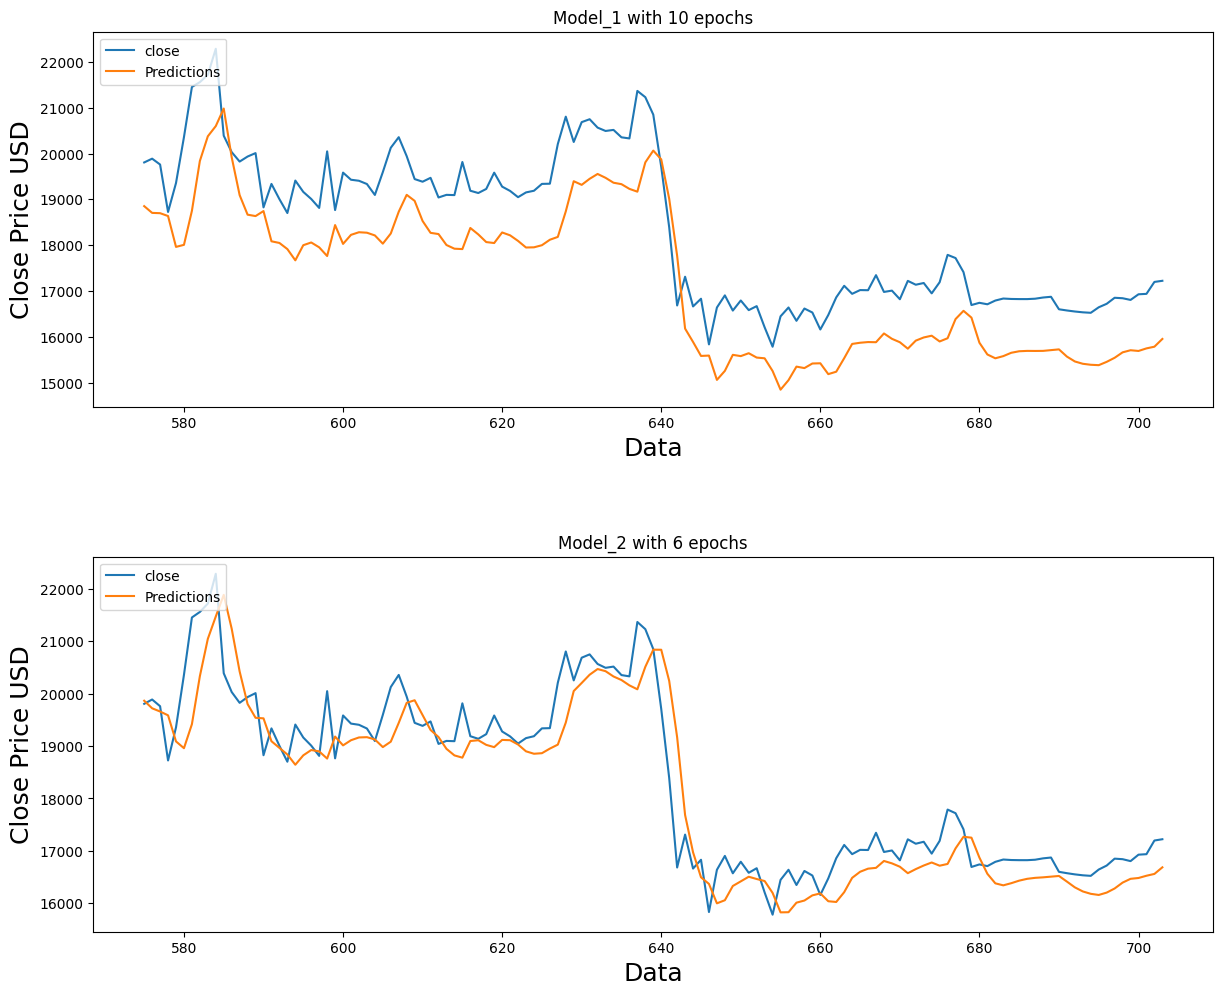

In [16]:
# Plot the data
train = df[60:60 + train_size]

#data for model_1
valid_1 = df[60 + train_size:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = df[60 + train_size:]
valid_2['Predictions'] = predictions_2

# Visualized the data
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(valid_1[['close', 'Predictions']])

plt.legend(['close', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(valid_2[['close', 'Predictions']])

plt.legend(['close', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

# Sentiment model

In [17]:
interpolated_df = pd.read_csv('updated_interpolated_sentiment.csv')
score_series = interpolated_df['neutralScore'].values.reshape(len(interpolated_df), 1)
score_scaler = MinMaxScaler(feature_range=(0,1))
scaled_score = score_scaler.fit_transform(score_series)

In [18]:
X_train_sentiment = []
for i in range(60, 60 + train_size):
  X_train_sentiment.append(scaled_score[i-60:i, 0])
X_train_sentiment = np.array(X_train_sentiment)
X_train_sentiment = np.reshape(X_train_sentiment, (X_train_sentiment.shape[0], X_train_sentiment.shape[1], 1))

X_train = np.concatenate((X_train, X_train_sentiment), axis=2)

print(X_train.shape)
print(y_train.shape)

(515, 60, 2)
(515,)


In [19]:
tf.random.set_seed(42)

model_3 = Sequential()
model_3.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model_3.add(LSTM(50, return_sequences=False))
model_3.add(Dense(25))
model_3.add(Dense(1))

model_3.compile(optimizer='adam', loss='mse')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_3.fit(X_train, y_train, batch_size=1, epochs=10)



Epoch 1/10
515/515 [==============================] - 7s 8ms/step - loss: 0.0073
Epoch 2/10
515/515 [==============================] - 5s 10ms/step - loss: 0.0035
Epoch 3/10
515/515 [==============================] - 4s 7ms/step - loss: 0.0027
Epoch 4/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0021
Epoch 5/10
515/515 [==============================] - 5s 9ms/step - loss: 0.0018
Epoch 6/10
515/515 [==============================] - 4s 9ms/step - loss: 0.0017
Epoch 7/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0017
Epoch 8/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0014
Epoch 9/10
515/515 [==============================] - 5s 10ms/step - loss: 0.0018
Epoch 10/10
515/515 [==============================] - 4s 8ms/step - loss: 0.0017


In [20]:
X_test_sentiment = []
for i in range(60+train_size, len(scaled_score)):
  X_test_sentiment.append(scaled_score[i-60:i, 0])
X_test_sentiment = np.array(X_test_sentiment)
X_test_sentiment = np.reshape(X_test_sentiment, (X_test_sentiment.shape[0], X_test_sentiment.shape[1], 1))

X_test = np.concatenate((X_test, X_test_sentiment), axis=2)

print(X_test.shape)
print(y_test.shape)

(129, 60, 2)
(129,)


In [21]:
predictions_3 = model_3.predict(X_test)

5/5 [==============================] - 1s 5ms/step


In [22]:
cryptoprice_predicted = scaler.inverse_transform(predictions_3[:, :1])
rmse = mse(df['close'][60+train_size:], cryptoprice_predicted, squared=False)
rmse

1246.952079763778

Text(0.5, 0, 'epochs')

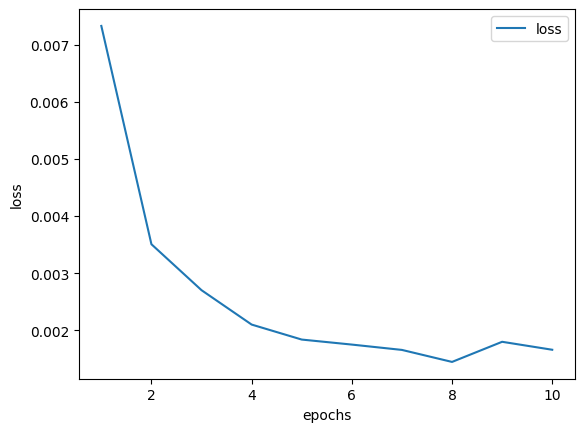

In [23]:
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

<ipython-input-24-81ad168798f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-24-81ad168798f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions'] = predictions_3


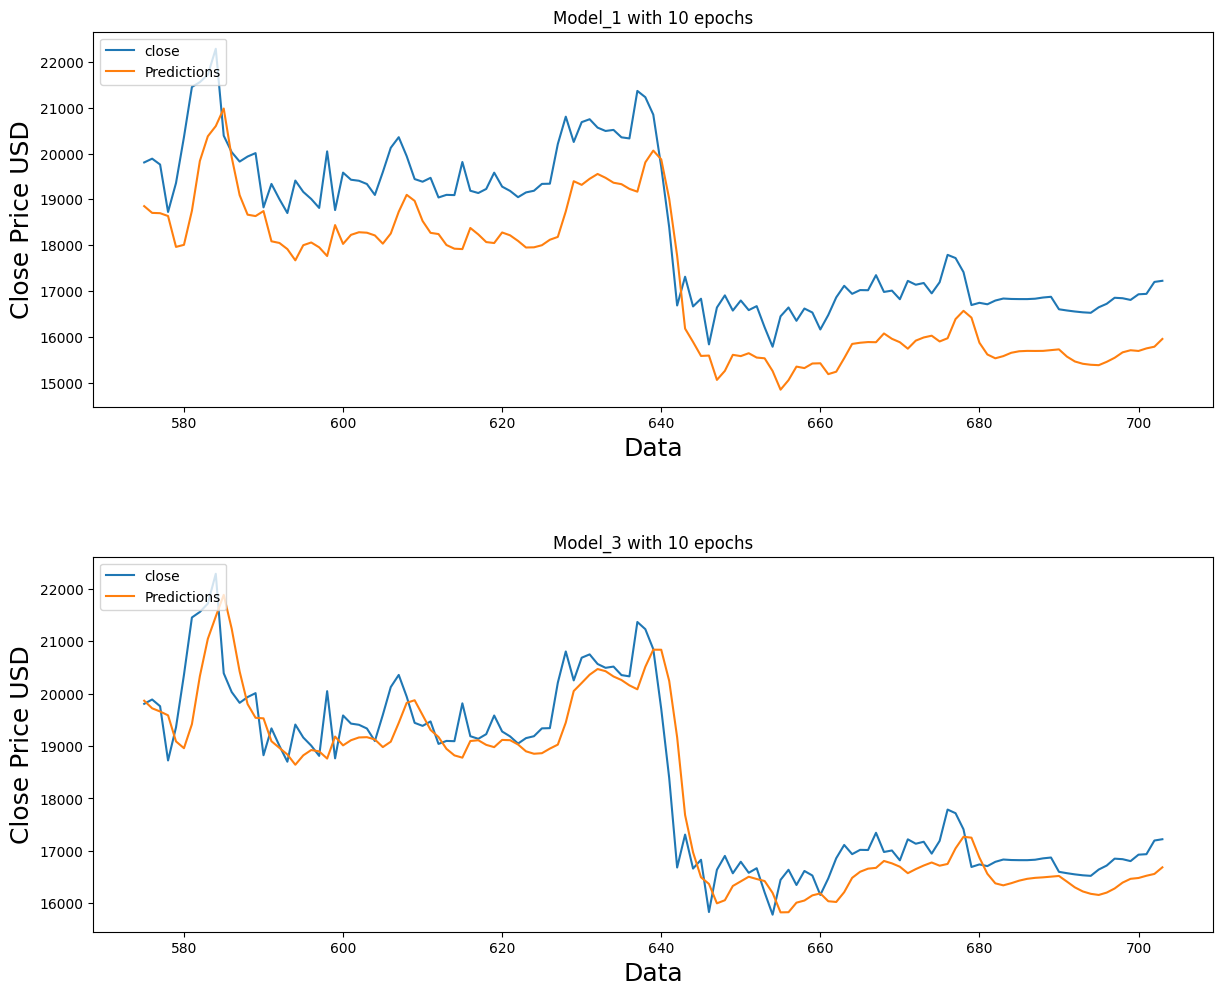

In [24]:

#data for model_1
valid_1 = df[60+train_size:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_3 = df[60+train_size:]
valid_3['Predictions'] = predictions_3

# Visualized the data
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(valid_1[['close', 'Predictions']])

plt.legend(['close', 'Predictions'], loc='upper left')

#model_3
plt.subplot(2, 1, 2)
plt.title('Model_3 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(valid_2[['close', 'Predictions']])

plt.legend(['close', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()